## Abstract
Hello, everyone. I'm btobab.

When I learned NLP, I found ~~I'm not very good at~~ I completely can't understand formula derivation, so I decided to learn the theoretical derivation of machine learning from the beginning.

This issue is mainly divided into two parts:
* The first part will derive the closed-form solution of the linear regression(least squares method) from three perspectives of matrix, geometry, probability, and provide reference code.
* The second part will derive the closed-formula solution of least squares method with regularization from two perspectives of matrix and probability, and construct a complete linear regressioin class, and implement the closed-solution method and gradient descent method with code at the same time.

## Introduction
Linear regression model is a model that use linear function to fit the relationship between one or more independent variables and the dependent variable ($y$).

The target variable ($y$) is a continuous numerical type, such as: housing price, number of people and rainfall. The regression model is to find a mapping function between input variables and output variables.

The learning of regression task equals to function fitting: use a function curve to make it fit the known data well and predict unknown data.

Regression task is divided into two processes: model learning and prediction. Construct a model based on given training dataset and predict corresponding output based on new input data.

## 1.Algorithm
**without regularization**

### A.Matrix perspective
**Note:in general, the vectors we are discussing are column vectors. Therefore, in order to ensure the shape of the matrix during the derivation process, a large number of transposition characters are used**

given dataset $\mathcal{D}=\{(x_1,y_1),(x_2,y_2)...(x_n,y_n)\}$

in which $x_i\in \mathcal{R^p}，y_i\in \mathcal{R}，i=1,2,...,n$

$$
X=(x_1,x_2,...,x_n)^T=\begin{pmatrix}
x_{11}&x_{12}&...&X_{1p}\\
x_{21}&x_{22}&...&x_{2p}\\
.&.&.&.&\\
.&.&.&.&\\
.&.&.&.&\\
x_{n1}&x_{n2}&...&x_{np}\\
\end{pmatrix}_{n*p}
$$
$$
Y=(y1,y2,...,y_n)_{n*1}^T
$$
It is the model we constrct: $f(w)=w^T*x+w_0*x_0。$

Generally set $x_0=1$,and $b=w_0*x_0$，$b$ is bias，$w$ is weight. below, for the convenience of derivation, we merge $w_0$ into $w$ and $x_0$ into $x$.

so the model is updated to $f(w)=w^T*x$

The loss function of least squares method is:
$$
L(w)=\sum_{i=1}^{i=n}\|y_i-w^T* x_i\|_2^2
$$
$$
=\begin{pmatrix}
y_1-w^T*x_1&y_2-w^T*x_2&...&y_n-w^T*x_n
\end{pmatrix}
\begin{pmatrix}
y_1-w^T*x_1\\
y_2-w^T*x_2\\
.\\
.\\
.\\
y_n-w^T*x_n\\
\end{pmatrix}
$$
$$
=(Y^T-w^T*X^T)(Y^T-w^T*X^T)^T
$$
$$
=(Y^T-w^T*X^T)(Y-X*w)
$$
$$
=Y^T*Y-w^T*X^T*Y-Y^T*X*w+w^T*X^T*X*w
$$
Note the second and third terms are transposed to each other, and observe its matrix shape: $(1,p)*(p,n)*(n,1)=(1,1)$

Knowning that these two terms are scalars, and the transposition of a scalar is itself, so the two can be conbined, get:
$$
L(w)=Y^T*Y-2*w^T*X^T*Y+w^T*X^T*X*w
$$
so$\widehat{w}=argmin(L(w))$

below, to find out the minimum of $L(w)$, we need to diffentiate $L(W)$

Note there are three terms in the formual. The first term has nothing to do with $w$ and can be removed. Then the remaining two terms involve matrix derivation.

Regarding to matrix derivation, author recommends three articles by a blogger(more detailed and rigorous than textbook, each formual has proof)
> [essence](https://zhuanlan.zhihu.com/p/263777564)

> [basics](https://zhuanlan.zhihu.com/p/273729929)

> [advanced](https://zhuanlan.zhihu.com/p/288541909)

The following is the derivative solution process of the above two terms.

Because $X,Y$ are constant matrices, the derivative can be obtained directly. However, since it is the derivative of $w$, the result must be transposed.
$$
\frac{d(2*w^T*X^T*Y)}{dw}=2*X^T*Y
$$
Below, let's solve the third term.
$$
d(w^T*X^T*X*w)=tr(d(w^T*X^T*X*w))=tr(X^T*X*d(w^T*w))
$$
$$
=tr(X^T*X*(d(w^T)*w+w^T*d(w)))=tr(X^T*X*w*(dw)^T)+tr(X^T*X*w^T*dw)
$$
$$
=tr(w^T*X^T*X*dw)+tr(X^T*X*w^T*dw)=tr(2*X^T*X*w^T*dw)
$$
so
$$
\frac{d(w^T*X^T*X*w)}{dw}=2*w*X^T*X
$$

so $\frac{dL(w)}{dw}=2*X^T*X*w-2*X^T*Y$

set the derivative equal to 0 to get the closed-form solution of the least squares method:
$$
\widehat{w}=(X^T*X)^{-1}*X^T*Y
$$

### B.Geometry perspective
$$
X=(x_1,x_2,...,x_n)^T=\begin{pmatrix}
x_{11}&x_{12}&...&X_{1p}\\
x_{21}&x_{22}&...&x_{2p}\\
.&.&.&.&\\
.&.&.&.&\\
.&.&.&.&\\
x_{n1}&x_{n2}&...&x_{np}\\
\end{pmatrix}_{n*p}
$$
$$
Y=(y1,y2,...,y_n)_{n*1}^T
$$

From a geometric perspective, we regard $X$ as a $p$ dimensional vector.

The first dimension of $X$ is $(x_{11},x_{21},...,x_{n1})$，the p-th dimension of $X$ is $(x_{1p},x_{2p},...,x_{np})$

and here $Y$ is regarded as a one-dimensional vector.

Now we assume $p=2$ because it is easier to draw. The diagram is as follows(I really drew it for a long time and pitifully asked for a star^ _ ^)
![](https://ai-studio-static-online.cdn.bcebos.com/ebe104f810e04c8991d17f69a1848f52937b0180d428477f9e8cbddbc57cf39a)


Change the model to $f(w)=Xw$, which means zoom $X$ with weight $w$

The geometric meaning of the least squares method is to find a $w$, so that the distance between vector $Y-Xw$ and space $w$ is the smallest. Of course the case of the smallest distance is perpendicular to space $X$.

so we get a formula: $X^T*(Y-Xw)=0$

then get the solution of $w$：
$$
X^T*X*w=X^T*Y
$$
$$
\widehat{w}=(X^T*X)^{-1}*X^T*Y
$$
we can see that the solved $w$ is the same as the result of matrix perspective.

### C.Probability perspective
As we known, in reality, it is hard to fit a distribution with a straight line. True data must have some randomness, that is, noise.

so we assume noise $\epsilon\backsim N(0,\sigma^2)$

so $y=f(w)+\epsilon=w^T*x+\epsilon$

so $y|x;w\backsim N(w^T*x,\sigma^2)$

Bring it into the probability density function of gaussian distribution:
$$
p(y|x;w)=\frac{1}{\sqrt{2\pi}*\sigma}*e^{-\frac{(y-w^T*x)^2}{2\sigma^2}}
$$

Then use $MLE$ (maximum likelihood estimate)

**Note: so-called MLE is to get the relative frequency via a large number of samples to approximate probability**

Let's assume a function: $\zeta(w)=\log{p(Y|X;w)}$

Since $n$ data are independent, we can change the probability to a form of continuous mutiplication:

$\zeta(w)=\log{\Pi_{i=1}^np(y_i|x_i;w)}=\Sigma_{i=1}^n \log{p(y_i|x_i;w)}$

bring the probability density function of gaussian distribution into the formula:

$\zeta(w)=\Sigma_{i=1}^n(\log{\frac{1}{\sqrt{2\pi}*\sigma}}-\frac{(y-w^T*x)^2}{2\sigma^2})$

since the former term has nothing to do with $w$, it can be ignored.

so:
$$
\widehat{w}=argmax{\zeta(w)}
$$
$$
=argmax{ \Sigma_{i=1}^n -\frac{(y-w^T*x)^2}{2\sigma^2}}
$$
$$
=argmin{ \Sigma_{i=1}^n (y-w^T*x)^2}
$$
The conclusion obtained by using maximum likelihood estimation is the definition of least squares method.

This also shows that least squares method hides a assumption that noise is gaussian distribution.

### Implement

[[5.20132625]]


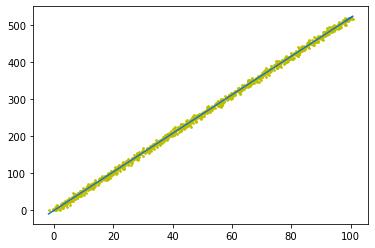

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# num of samples
n = 1000
# noise
epsilon = 1
X = np.expand_dims(np.linspace(0,100,1000), axis=-1)
w = np.asarray([5.2])
Y = X * w
# apply noise to X
X += np.random.normal(scale=epsilon, size=(X.shape))
X_T = X.transpose()
w_hat = np.matmul(np.linalg.pinv((np.matmul(X_T, X))), np.matmul(X_T, Y))
print(w_hat)
plt.scatter(X, Y, s=3, c="y")
Y_hat = X * w_hat
plt.plot(X, Y_hat)
plt.show()

## 2.Algorithm
**with regularization**

### A.Matrix perspective

Firstly, given a new loss functioin with regularization:
$$
\zeta(w)=\Sigma_{i=1}^{n}||y_i-w^T * x_i||^2 + \lambda * ||w||^2
$$
then the derivation of loss function from matrix perspective without regularization is referenced:
$$
\zeta(w)=Y^T*Y-2*w^T*X^T*Y+w^T*X^T*X* w+\lambda * ||w||^2
$$
so$\widehat{w}=argmax(\zeta(w))$

differentiate $\zeta(w)$:
$$
\frac{\partial \zeta(w)}{\partial w}=2*X^T*X*w-2*X^T* Y+2\lambda * w 
$$
set the derivative equal to 0 to get the closed-form solution of least squares method with regularization:
$$
\widehat{w}=(X^T*X+\lambda * I)^{-1} *X^T*Y
$$
$I$ is identity matrix

### B.Probability perspective

assume noise $\epsilon \backsim N(0,\sigma_1^2)$

$w \backsim N(0,\sigma_2^2)$

since $y=w^T* x + \epsilon$

get $y|w \backsim N(w^T* x,\sigma_1^2)$

Next we use MAP(Maximum a posteriori estimate):

according to Bayes theorem:
$$
P(w|Y)=\frac{P(Y|w)* P(w)}{P(Y)}
$$
$P(w)$ is a priori probability, $P(Y|w)$ is a likelihood probability, $P(Y)$ is normalized probability, priori probability is mutiplied by the likelihood probability and normalized to obtain the posteriori probability $P(w|Y)$.

actually $P(Y)$ is constant, so:
$$
\widehat{w}=argmax(P(w|Y))=argmax(P(Y|w)* P(w))=argmax(log(P(Y|w)* P(w)))
$$
since samples are independent, we can change the probability to a form of continuous mutipication.
$$
=argmax(log(\prod_{i=1}^n P(y_i|w)* P(w)))=argmax(\sum_{i=1}^n log(P(y_i|w)+ log(P(w))))
$$
bring it into probability density function of gaussian distribution to get:
$$
\widehat{w}=argmax(\sum_{i=1}^nlog(\frac{1}{\sqrt{2\pi}* \sigma_1})-\frac{(y_i-w^T* x_i)^2}{2\sigma_1^2}+log(\frac{1}{\sqrt{2 \pi}* \sigma_2})-\frac{w^2}{2\sigma_2^2})
$$

since both $\sigma_1$ and $\sigma_2$ are hyperparameters, they can be omitted.

so:
$$
\widehat{w}=argmin(\sum_{i=1}^n \frac{(y_i-w^T* x_i)^2}{2\sigma_1^2}+\frac{w^2}{2\sigma_2^2})
$$
$$
=argmin(\sum_{i=1}^n (y_i-w^T* x_i)^2+\frac{\sigma_1^2}{\sigma_2^2}* w^2)
$$
we can see that the result derived via $MAP$ is the definition of the least squares method with regularization.

### Implement
**with regularization**

In [2]:
import os
os.chdir("../")
from models.linear_models import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

([[5.267414573703277]], [0.8075190886132994])


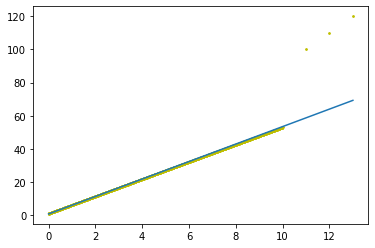

In [3]:
X_ = np.expand_dims(np.linspace(0, 10, 1000), axis=-1)
X = np.c_[X_, np.ones(1000)]
w = np.asarray([5.2, 1])
Y = X.dot(w)
X = np.r_[X, np.asarray([[11, 1], [12, 1], [13, 1]])]
Y = np.r_[Y, np.asarray([100, 110, 120])]

model = LinearRegression(l2_ratio=1e1, epoch_num=1000, lr=1e-2, batch_size=100, if_standard=False)
model.fit(X[:, :-1], Y)
print(model.get_params())
model.draw(X[:, :-1], Y)

## Conclusion
In this issue, we learned：
1. what's linear regression
2. the formula derivation of linear regression without regularization from matrix, geometry, probability perspective
3. implement the least squares method without regularizatioin with code
4. the formula derivation of linear regression with regularizatioin from matrix and probability perspective
5. implement complete linear regression class with code

## Reference
> [video](https://www.bilibili.com/video/BV1aE411o7qd?p=10)

> [essence](https://zhuanlan.zhihu.com/p/263777564)

> [basic](https://zhuanlan.zhihu.com/p/273729929)

> [advanced](https://zhuanlan.zhihu.com/p/288541909)